**Building CNN classifier from scratch**

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

We are loading data from standard fashion_mnist which are of the following classes

      ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_lables) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train images shape ",train_imgs.shape)
print("Test images shape ",test_imgs.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train images shape  (60000, 28, 28)
Test images shape  (10000, 28, 28)


In [4]:
train_imgs_gr = train_imgs.reshape(train_imgs.shape[0], 28, 28, 1)
test_imgs_gr = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)

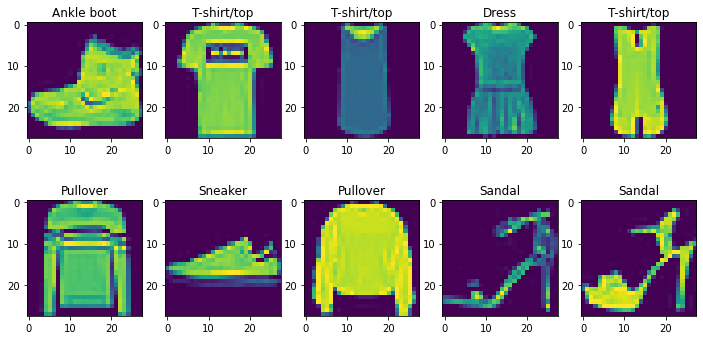

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
c = 0
for i in range(10):
  idx = i // 5
  idy = i % 5
  ax[idx, idy].imshow(train_imgs_gr[i].reshape(28,28))
  ax[idx, idy].set_title(classes[train_labels[i]])

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

Training our model

In [9]:
EPOCHS = 100
train_images_scaled = train_imgs_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
restore_best_weights=True,
verbose=1)

history = model.fit(train_images_scaled, train_labels,
batch_size=32,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/100
1688/1688 [==============================] - 35s 20ms/step - loss: 0.5257 - accuracy: 0.8068 - val_loss: 0.3488 - val_accuracy: 0.8687
Epoch 2/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3409 - accuracy: 0.8756 - val_loss: 0.3038 - val_accuracy: 0.8853
Epoch 3/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2954 - accuracy: 0.8914 - val_loss: 0.2827 - val_accuracy: 0.8967
Epoch 4/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2693 - accuracy: 0.9014 - val_loss: 0.2743 - val_accuracy: 0.8965
Epoch 5/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2469 - accuracy: 0.9083 - val_loss: 0.2564 - val_accuracy: 0.9038
Epoch 6/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2290 - accuracy: 0.9156 - val_loss: 0.2491 - val_accuracy: 0.9087
Epoch 7/100
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2118 - accuracy: 0.9214 - val_loss: 0

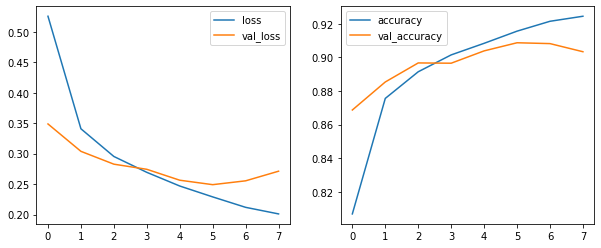

In [10]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [11]:
test_images_scaled = test_imgs_gr / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.5038105e-09, 5.0240184e-10, 7.1540107e-10, 8.7798346e-10,
        1.6057060e-09, 9.4654817e-05, 6.9861064e-09, 2.6742791e-04,
        5.9125664e-09, 9.9963784e-01],
       [1.3927423e-06, 5.6505092e-11, 9.9858654e-01, 9.2936780e-08,
        1.0166419e-04, 2.0261891e-11, 1.3100840e-03, 1.2430433e-11,
        1.1749072e-07, 3.7367804e-12],
       [3.1372832e-13, 9.9999994e-01, 1.4486294e-13, 1.0925285e-12,
        1.9252750e-12, 2.3965037e-17, 7.6591755e-14, 7.4672437e-20,
        2.3715152e-15, 2.2464844e-18],
       [6.1591912e-11, 9.9999994e-01, 1.9617965e-11, 1.4601159e-10,
        4.1756512e-10, 2.8997726e-15, 6.0304587e-12, 6.1521078e-16,
        1.5839108e-13, 8.6698084e-16],
       [5.7825077e-02, 2.6320113e-06, 7.6433574e-03, 1.1635676e-03,
        4.1174251e-03, 8.8495403e-07, 9.2920178e-01, 6.4909442e-09,
        4.5073732e-05, 2.6416510e-07]], dtype=float32)

In [12]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([9, 2, 1, 1, 6])

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_lables, prediction_labels, target_names=classes))
pd.DataFrame(confusion_matrix(test_lables, prediction_labels), index=classes, columns=classes)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.83      0.85      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.85      0.86      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.69      0.75      0.72      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,821,0,12,14,2,1,142,0,8,0
Trouser,2,980,0,12,1,0,3,0,2,0
Pullover,14,0,834,7,49,0,95,0,1,0
Dress,14,1,7,913,31,0,31,0,3,0
Coat,0,1,42,24,862,0,68,0,3,0
Sandal,0,0,0,0,0,975,0,25,0,0
Shirt,94,0,60,22,63,1,754,0,6,0
Sneaker,0,0,0,0,0,11,0,981,1,7
Bag,3,0,4,4,5,1,5,1,977,0
Ankle boot,0,0,0,0,0,6,1,65,0,928


In [14]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 21ms/step


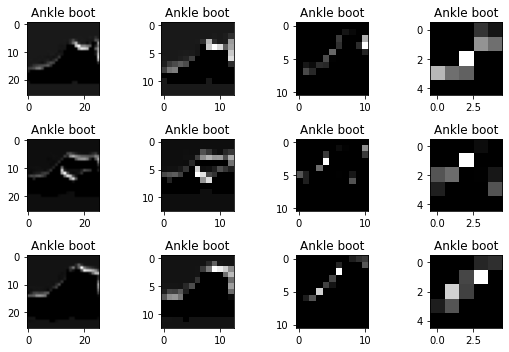

In [16]:
f, axarr = plt.subplots(3,4, figsize=(8, 5))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 13

for x in range(0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(classes[test_lables[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[1,x].grid(False)
  axarr[1,x].set_title(classes[test_lables[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[2,x].grid(False)
  axarr[2,x].set_title(classes[test_lables[THIRD_IMAGE]])
  plt.tight_layout()